In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [2]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1512, 46)

In [126]:
df_heatmap = df.drop(labels=['GHGEmissionsIntensity',
                    'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','Latitude','Longitude','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','PrimaryPropertyType_','ZipCode','NumberofBuildings','PropertyGFAParking','LargestPropertyUseTypeGFA','ProportionParkingGFA','Distribution Center','Low-Rise Multifamily','Mixed Use Property','Hotel','Laboratory','Office','Restaurant','Residence Hall','Senior Care Community','University'], axis=1, inplace=False)
df_heatmap.shape

(1512, 23)

<AxesSubplot:>

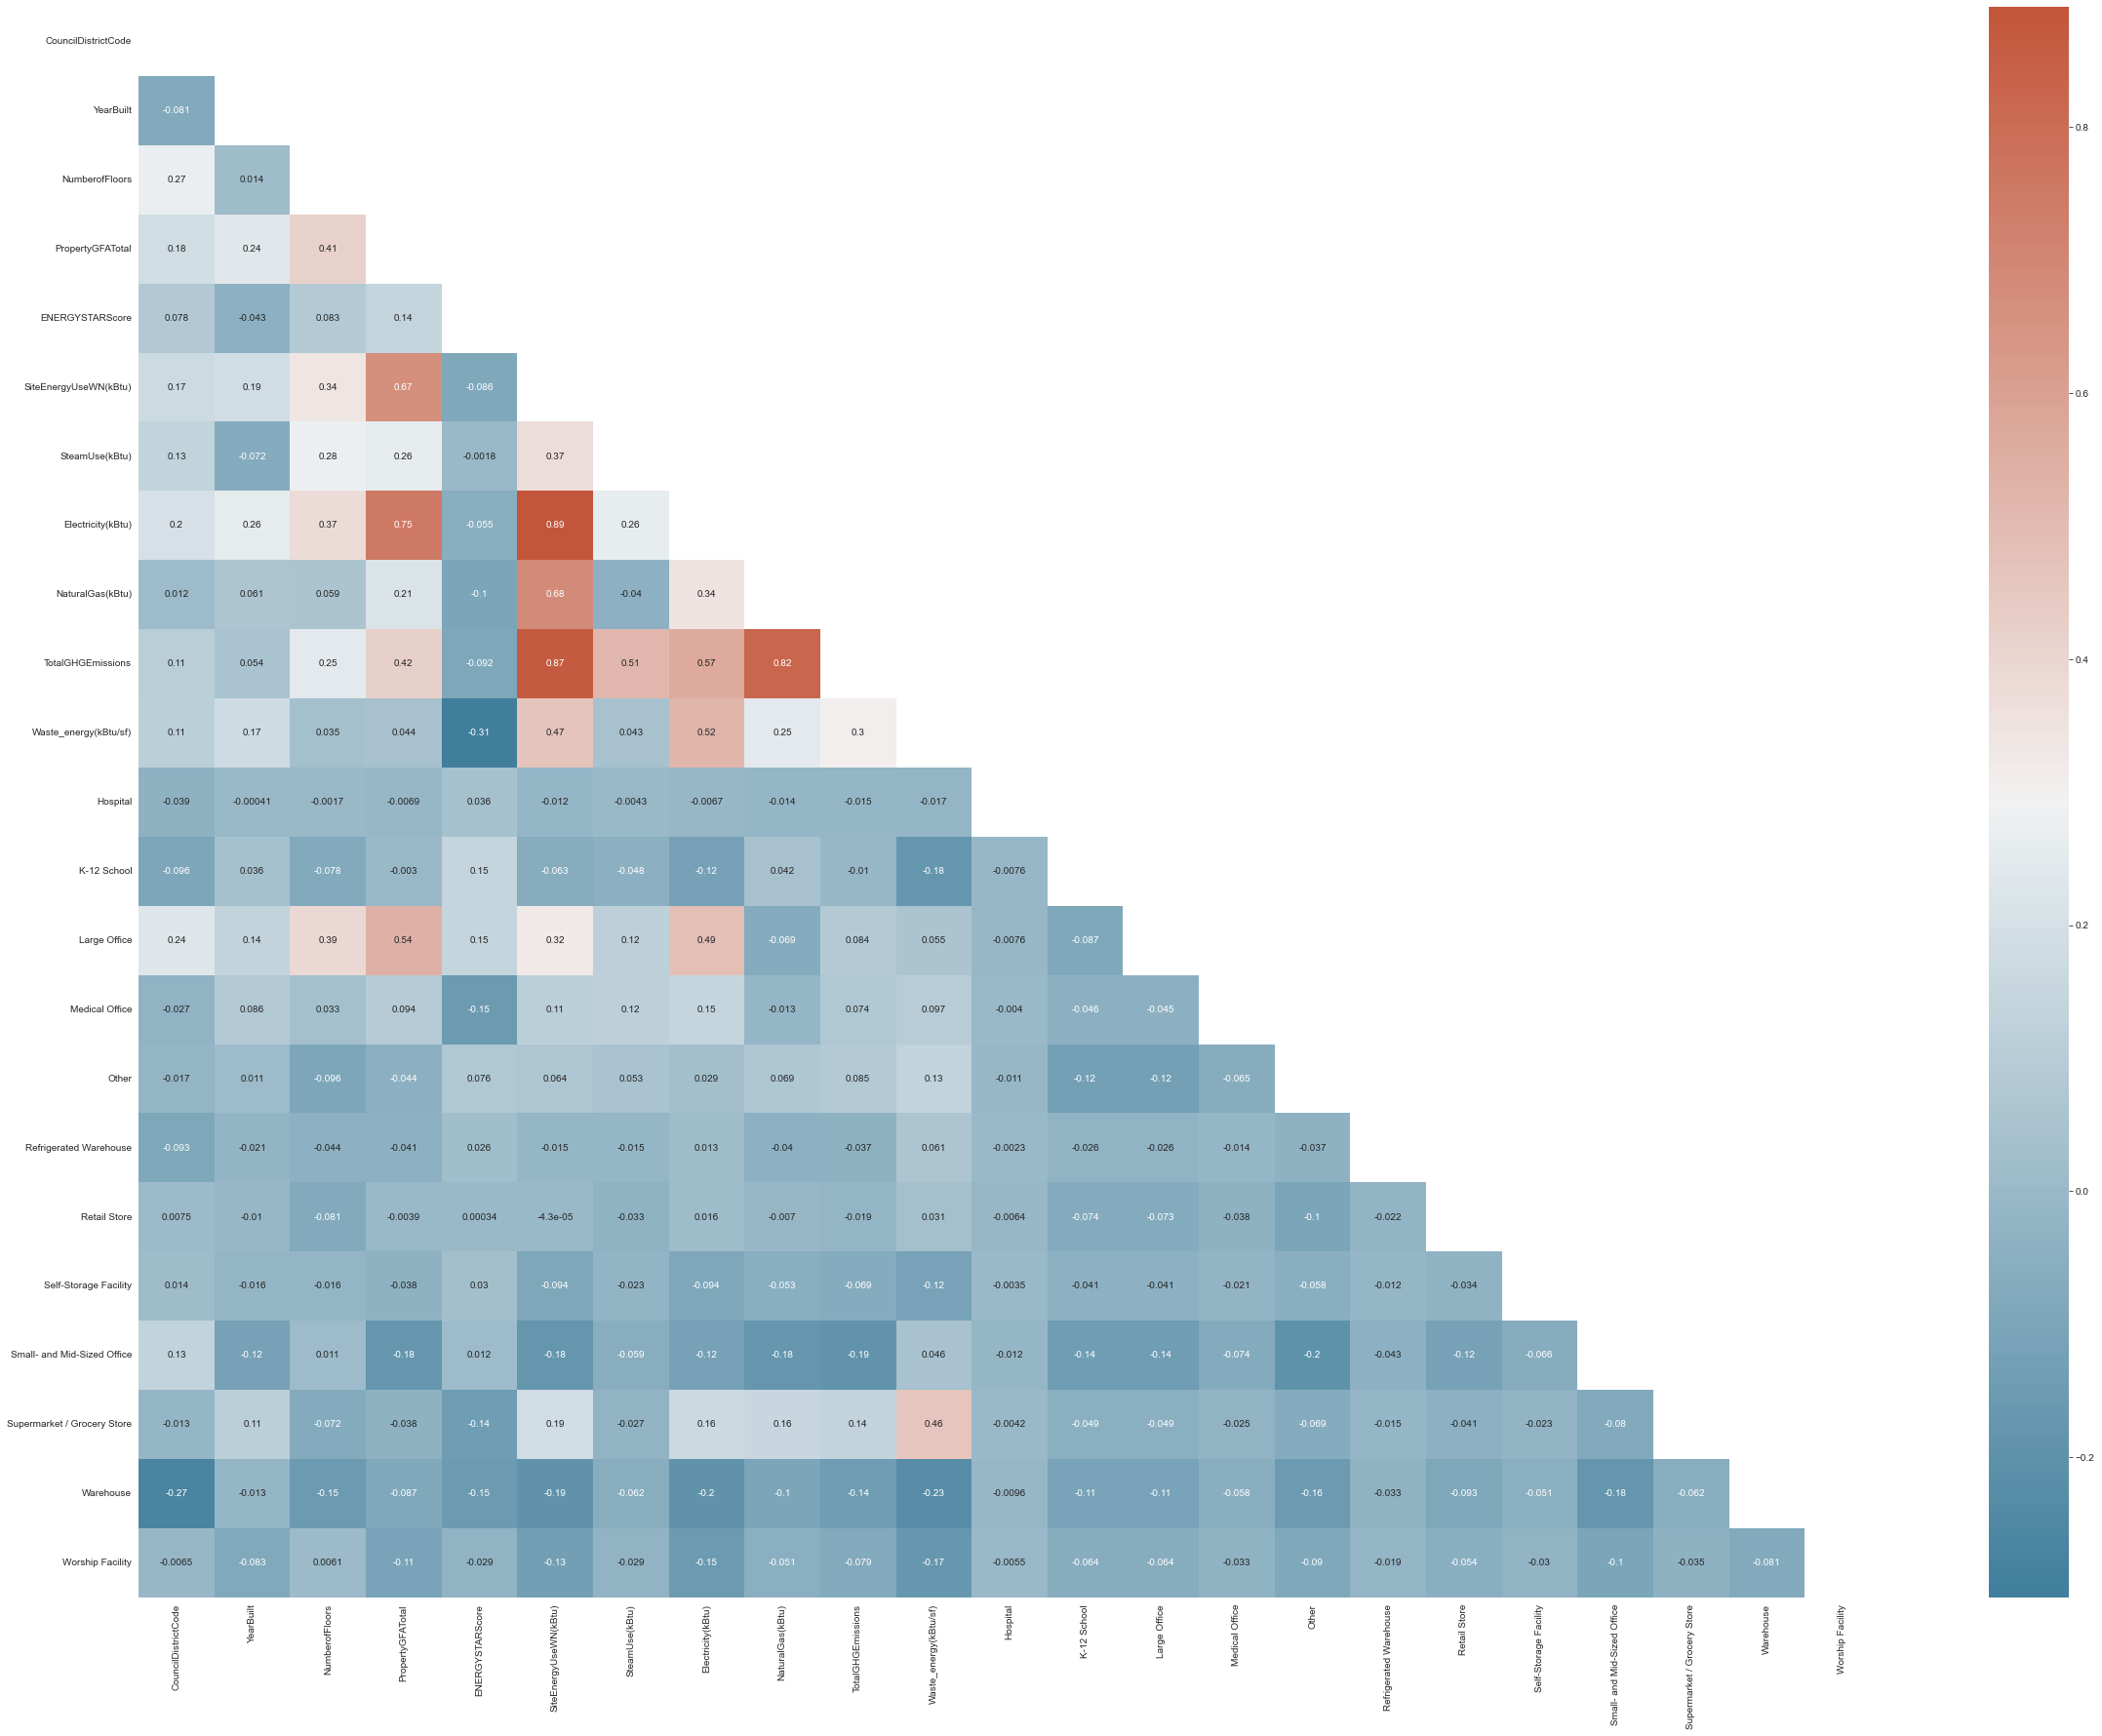

In [128]:
corr = df_heatmap.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(40, 30))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

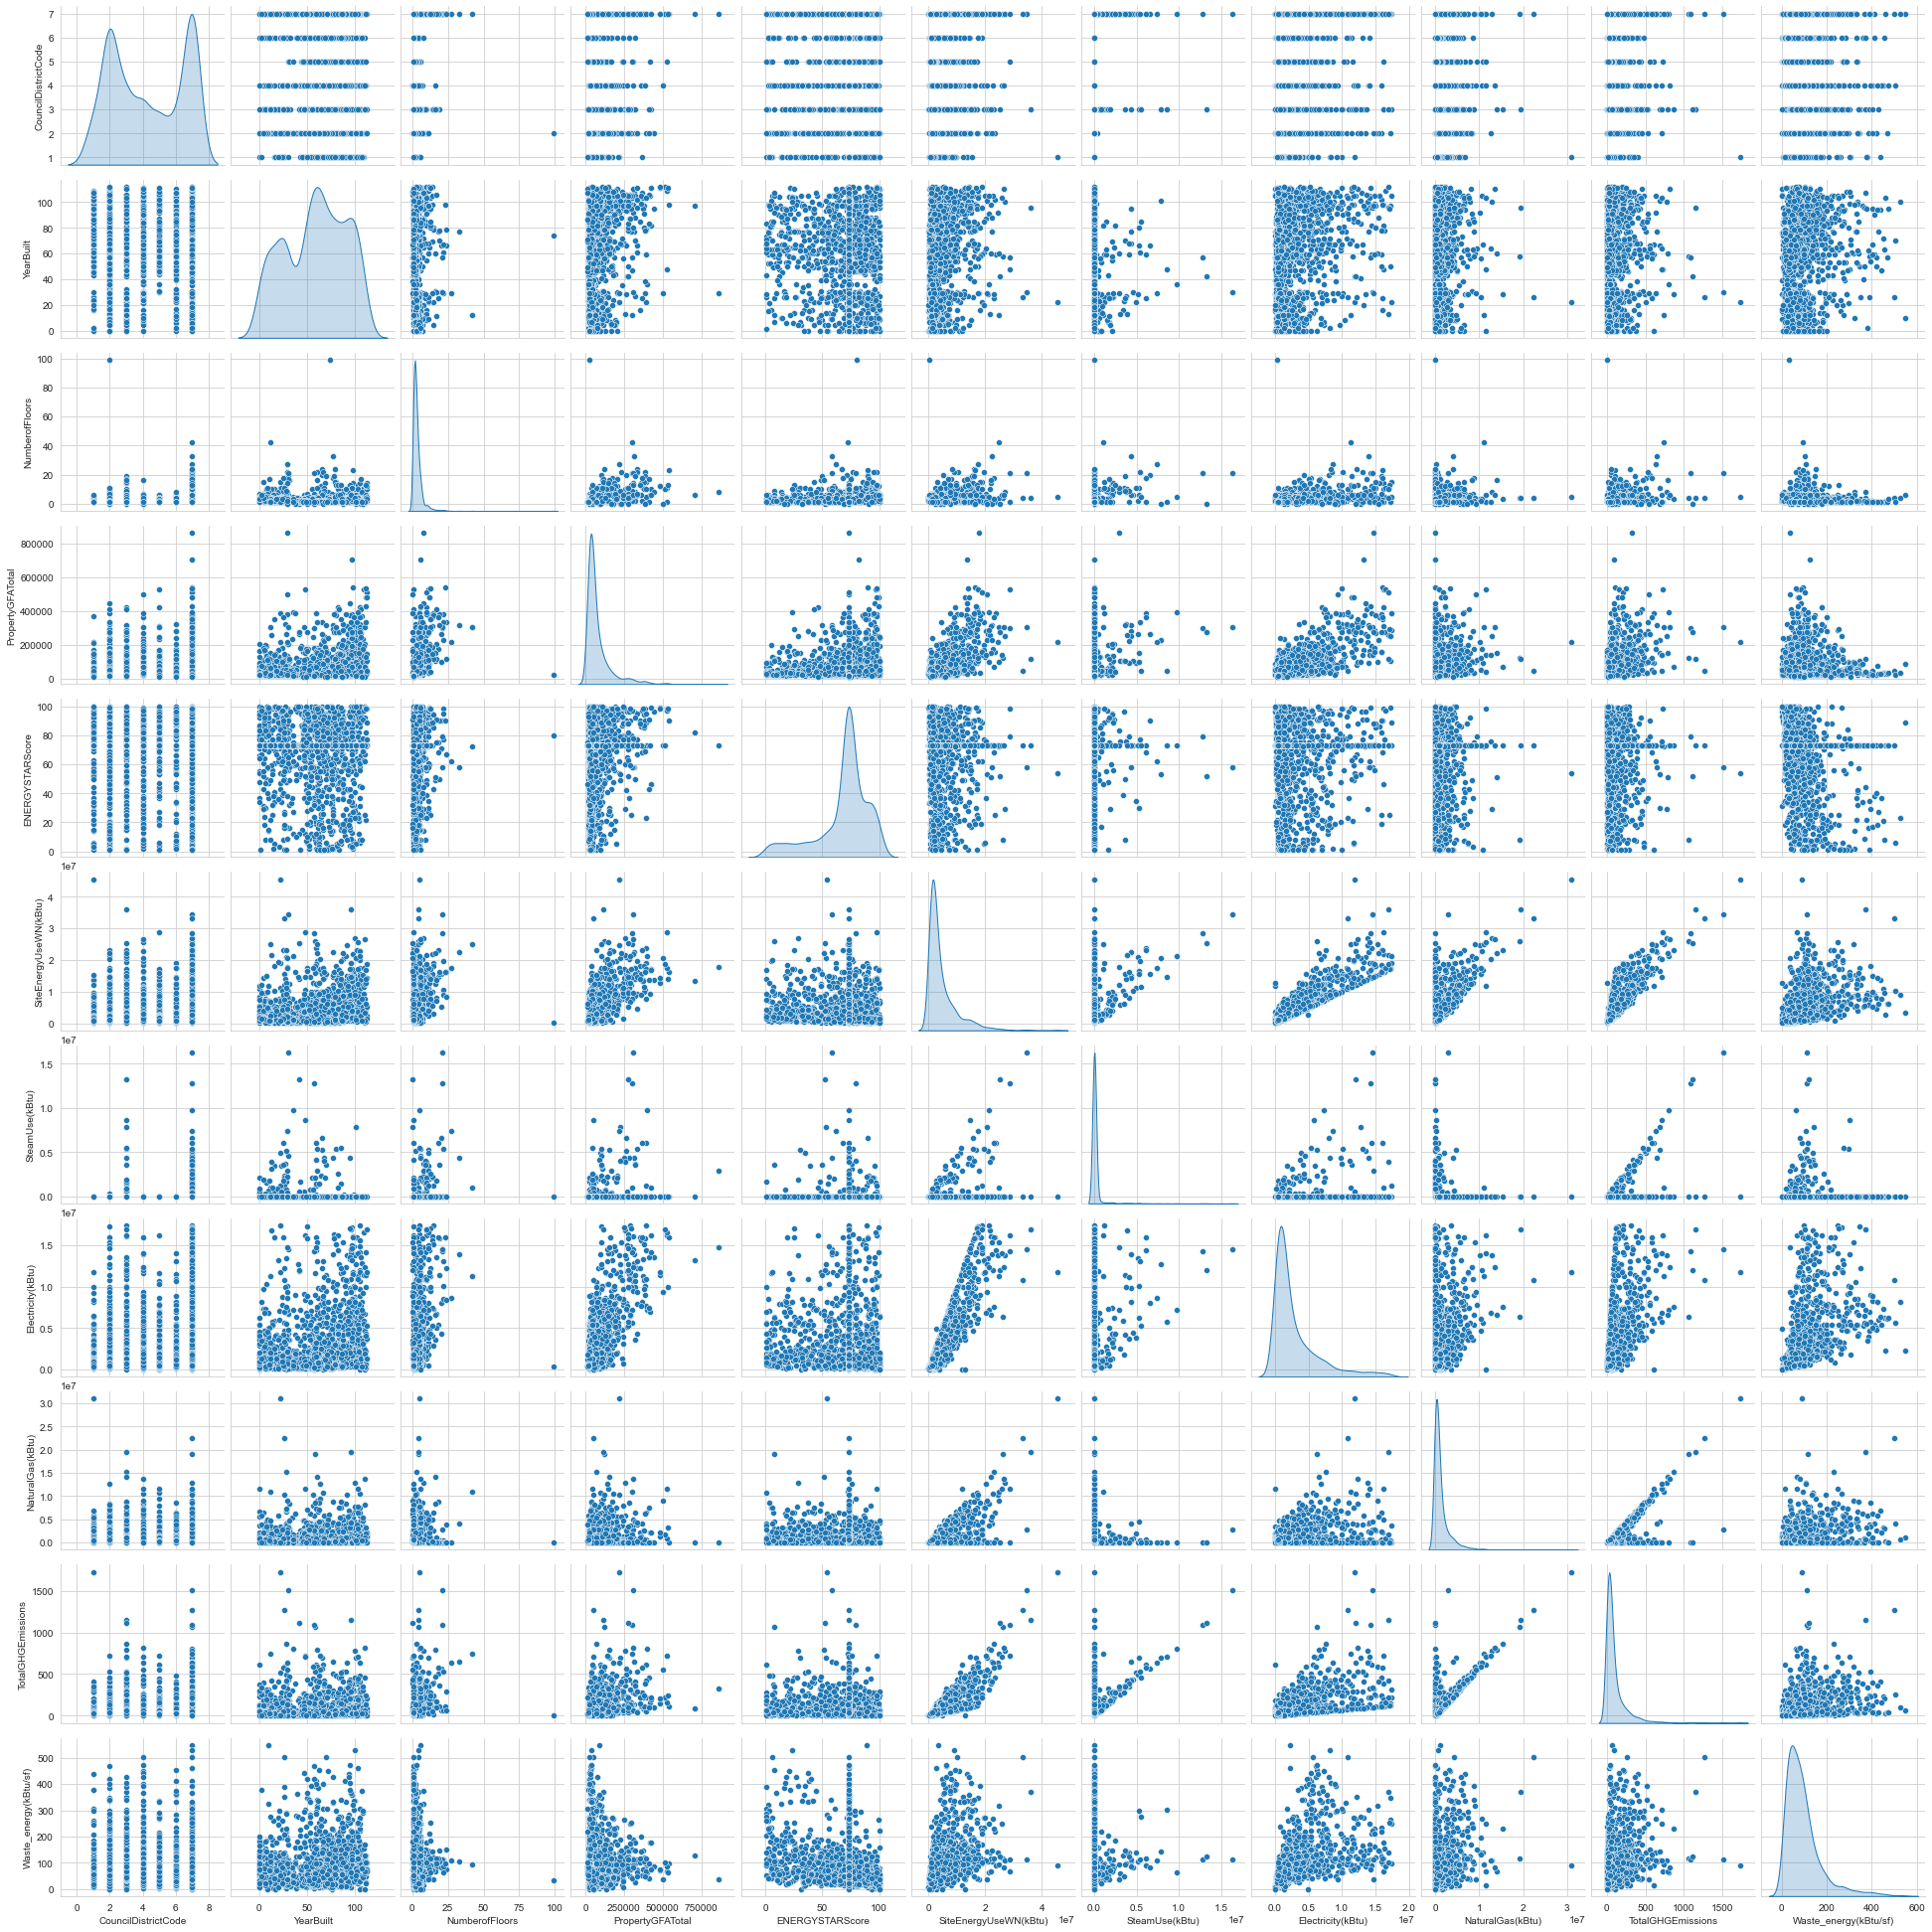

In [129]:
df_pairplot = df.drop(labels=['GHGEmissionsIntensity',
                              'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','Latitude','Longitude','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','PrimaryPropertyType_','ZipCode','NumberofBuildings','PropertyGFAParking','LargestPropertyUseTypeGFA','ProportionParkingGFA','Distribution Center','Low-Rise Multifamily','Mixed Use Property','Hotel','Laboratory','Office','Restaurant','Residence Hall','Senior Care Community','University','Large Office','Laboratory','Warehouse','University','Other','Medical Office','K-12 School','Supermarket / Grocery Store','Retail Store','Refrigerated Warehouse','Hospital','Worship Facility','Small- and Mid-Sized Office','Self-Storage Facility'], axis=1, inplace=False)
df_pairplot.shape
sns.pairplot(data=df_pairplot, diag_kind='kde')

In [3]:
df['Electricity(kBtu)'] = df['Electricity(kBtu)'] / df['SiteEnergyUseWN(kBtu)']
df['NaturalGas(kBtu)'] = round(df['NaturalGas(kBtu)'],2) / round(df['SiteEnergyUseWN(kBtu)'],2)
df['SteamUse(kBtu)'] = df['SteamUse(kBtu)'] / df['SiteEnergyUseWN(kBtu)']

In [4]:
X = df.drop(labels=['TotalGHGEmissions', 'GHGEmissionsIntensity',
                    'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Latitude','Longitude','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','PrimaryPropertyType_','ZipCode','NumberofBuildings','PropertyGFAParking','LargestPropertyUseTypeGFA','ProportionParkingGFA','ENERGYSTARScore'], axis=1, inplace=False)
target3_siteEnergyuse = np.log(df['SiteEnergyUseWN(kBtu)'])
# target3_siteEnergyuse = df['SiteEnergyUseWN(kBtu)']

target4_totalGHGemissions = df['TotalGHGEmissions']

In [5]:
df = df.drop(labels=['TotalGHGEmissions', 'GHGEmissionsIntensity',
                     'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','Latitude','Longitude','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','PrimaryPropertyType_','ZipCode','NumberofBuildings','PropertyGFAParking','LargestPropertyUseTypeGFA','ProportionParkingGFA','ENERGYSTARScore'], axis=1, inplace=False)

In [6]:
X

,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Waste_energy(kBtu/sf),Distribution Center,Hospital,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,7,27,12,88434,0.268728,0.529177,0.171177,104.699997,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,93,11,103566,0.000000,0.374270,0.593813,81.499992,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,26,10,61320,0.318772,0.398590,0.260726,110.699997,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,77,18,175580,0.000000,0.366295,0.600689,96.900009,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,96,2,97288,0.000000,0.585885,0.374765,178.899994,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,2,87,1,12294,0.000000,0.555959,0.345147,99.400009,0,0,...,0,0,0,0,0,0,0,0,0,0
1508,2,101,1,16000,0.000000,0.376335,0.525507,53.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1509,7,71,1,13157,0.000000,0.296040,0.656408,307.699982,0,0,...,0,0,0,0,0,0,0,0,0,0
1510,1,86,1,14101,0.000000,0.445646,0.473405,55.300003,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,target3_siteEnergyuse, test_size=0.2, random_state=42)

In [8]:
#Scaling numeric features using sklearn StandardScalar
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y
estimator_linear = lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
ypred = np.exp(ypred)
#Metrics to evaluate your model
print('LINEAR')
# print('r2 score:',r2_score(y_test, ypred))
print('r2 score antilog:',r2_score(np.exp(y_test), ypred))
# print('mean absolute error',mean_absolute_error(y_test, ypred))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test), ypred))
# print('RMSE',np.sqrt(mean_squared_error(y_test, ypred)))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test),ypred)))

dt = DecisionTreeRegressor()
estimator_tree= dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
yhat = np.exp(yhat)


print('DECISION TREE')
# print('r2 score:',r2_score(y_test, yhat))
print('r2 score antilog:',r2_score(np.exp(y_test), yhat))
# print('mean absolute error',mean_absolute_error(y_test, yhat))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test), yhat))
# print('RMSE',np.sqrt(mean_squared_error(y_test, yhat)))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test),yhat)))


LINEAR
r2 score antilog: 0.2906978045112688
mean absolute error antilog: 1784176.3263814694
RMSE antilog 4109253.819746896
DECISION TREE
r2 score antilog: 0.667315166463172
mean absolute error antilog: 1438784.310230429
RMSE antilog 2814257.4004871664


In [10]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=1000,criterion='squared_error',
                                  max_depth=8,min_samples_split=5,
                                  min_samples_leaf=5,max_features=3)
estimator_gradient = model.fit(X_train,y_train)
y_pred_gradient = model.predict(X_test)
y_pred_gradient = np.exp(y_pred_gradient)

print(model.score(X_test, y_test))

# print('R2 score:',r2_score(y_test,y_pred_gradient))
print('r2 score antilog:',r2_score(np.exp(y_test), y_pred_gradient))
# print('mean absolute error:',mean_absolute_error(y_test,y_pred_gradient))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test),y_pred_gradient))
# print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_gradient)))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test),y_pred_gradient)))

0.8924866636297158
r2 score antilog: 0.8354401317307885
mean absolute error antilog: 998263.3736194951
RMSE antilog 1979289.3187013261


/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


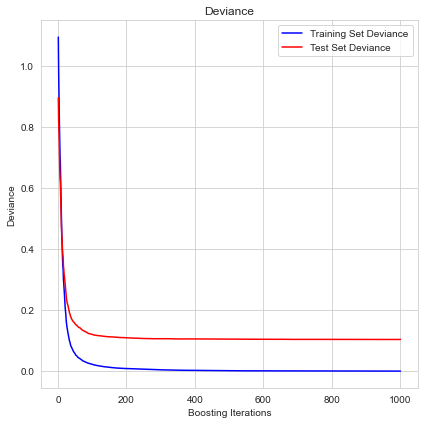

In [11]:
test_score = np.zeros(1000, dtype=np.float64)
for i, y_pred_gradient in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred_gradient)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(1000) + 1,
    model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(1000) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

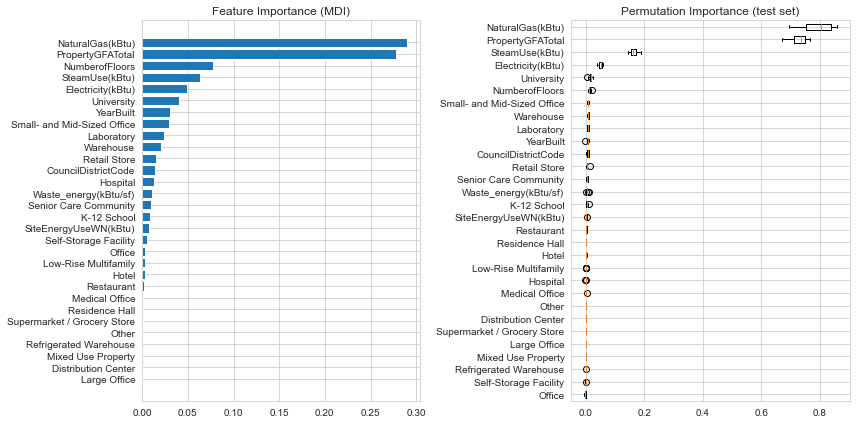

In [12]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [22]:
import shap

shap.initjs()

In [26]:
grad_reg_explainer1 = shap.TreeExplainer(model, X_train)

In [30]:
sample_idx = 0

shap_vals = grad_reg_explainer1.shap_values(X_test[sample_idx])

print("Expected/Base Value : ", grad_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", model.predict(X_test[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", grad_reg_explainer1.expected_value + shap_vals.sum())

Expected/Base Value :  14.817406377801879

Shap Values for Sample 0 :  [-2.17796883e-02 -2.29863599e-02 -5.79373892e-02 -7.45410646e-01
 -1.73735924e-02  1.36317320e-01  8.34767074e-02 -7.94602971e-02
  2.02935893e-03  0.00000000e+00 -1.40804163e-03 -2.04703768e-02
  0.00000000e+00 -1.34277326e-02  0.00000000e+00 -7.20283497e-03
  1.49702249e-03  0.00000000e+00 -2.17040271e-04  4.55133601e-04
 -3.67305000e-04  0.00000000e+00 -1.09683946e-03  8.87015189e-03
  0.00000000e+00  6.68544082e-04 -2.44167870e-02 -6.70058308e-04
  2.82858436e-02  1.54636613e-02]


Prediction From Model                            :  14.080245136120823
Prediction From Adding SHAP Values to Base Value :  14.080245132863874


 98%|===================| 298/303 [00:16<00:00]        

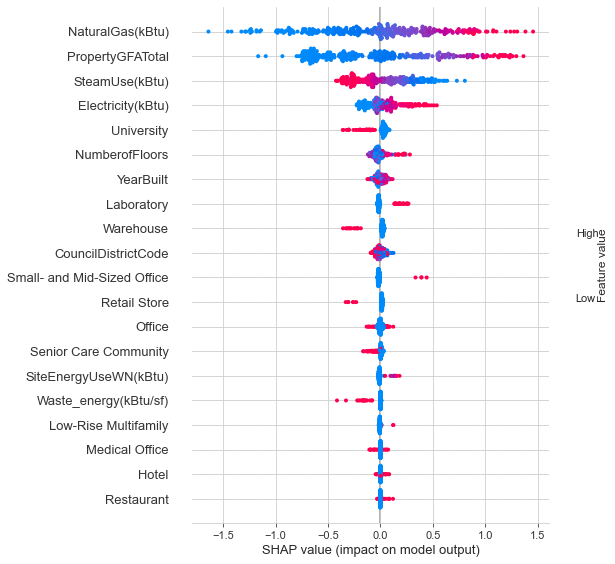

In [31]:
shap.summary_plot(grad_reg_explainer1.shap_values(X_test),
                  features = X_test,
                  feature_names=df.columns)

 98%|===================| 296/303 [00:16<00:00]        

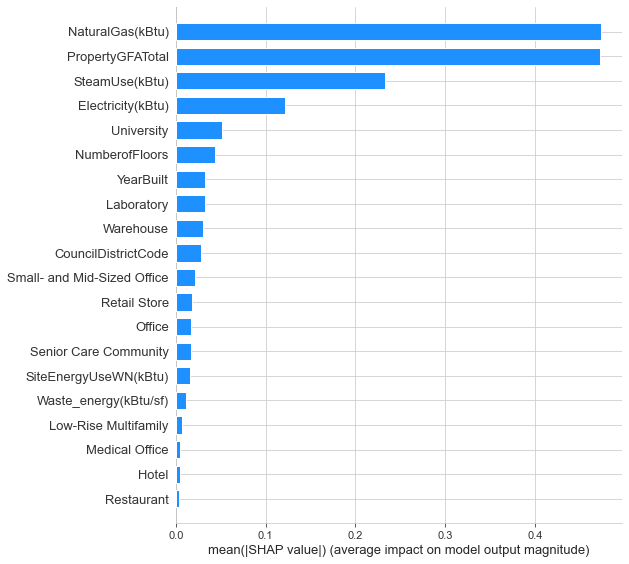

In [33]:
shap.summary_plot(grad_reg_explainer1.shap_values(X_test),
                  feature_names=df.columns,
                  plot_type="bar",
                  color="dodgerblue"
                  )

In [40]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

model.score(X_test, y_test)

NaturalGas(kBtu)0.824 +/- 0.048
PropertyGFATotal0.665 +/- 0.049
SteamUse(kBtu)0.132 +/- 0.013
Electricity(kBtu)0.070 +/- 0.009
University0.014 +/- 0.003
NumberofFloors0.012 +/- 0.004
Laboratory0.011 +/- 0.004
Small- and Mid-Sized Office0.006 +/- 0.002
SiteEnergyUseWN(kBtu)0.004 +/- 0.001
K-12 School0.002 +/- 0.001


0.8880545149923498

Feature importance is the increase in model error when the feature’s information is destroyed.
Feature importance provides a highly compressed, global insight into the model’s behavior.

A positive aspect of using the error ratio instead of the error difference is that the feature importance measurements are comparable across different problems.

The importance measure automatically takes into account all interactions with other features. By permuting the feature you also destroy the interaction effects with other features. This means that the permutation feature importance takes into account both the main feature effect and the interaction effects on model performance. This is also a disadvantage because the importance of the interaction between two features is included in the importance measurements of both features. This means that the feature importances do not add up to the total drop in performance, but the sum is larger. Only if there is no interaction between the features, as in a linear model, the importances add up approximately.



In [29]:
forest = RandomForestRegressor()
estimator_forest = forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
y_pred_forest = np.exp(y_pred_forest)

# print('R2 score:',r2_score(y_test,y_pred_forest))
print('r2 score antilog:',r2_score(np.exp(y_test), y_pred_forest))
# print('mean absolute error:',mean_absolute_error(y_test,y_pred_forest))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test),y_pred_forest))
# print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_forest)))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test),y_pred_forest)))

r2 score antilog: 0.8592176287960698
mean absolute error antilog: 944864.9379899333
RMSE antilog 1830718.0072477278


In [13]:
y_test  = y_test.reset_index(drop= True)
y_test = np.exp(y_test)

In [14]:
y_pred_forest_as_series = pd.Series(y_pred_forest)
data_forest= pd.concat([y_test,y_pred_forest_as_series],axis=1)

In [15]:
y_pred_gradient_as_series = pd.Series(y_pred_gradient)
data_gradientboost= pd.concat([y_test,y_pred_gradient_as_series],axis=1)
data_gradientboost.columns

Index(['SiteEnergyUseWN(kBtu)', 0], dtype='object')

In [16]:
ypred_as_series = pd.Series(ypred)
data_linear_regression = pd.concat([y_test,ypred_as_series],axis=1)
data_linear_regression.columns

Index(['SiteEnergyUseWN(kBtu)', 0], dtype='object')

In [17]:
yhat_as_series = pd.Series(yhat)
data_decision_tree = pd.concat([y_test, yhat_as_series], axis=1)
data_decision_tree

,SiteEnergyUseWN(kBtu),0
0,1.270515e+06,1.199845e+06
1,2.644411e+06,3.586461e+06
2,7.996790e+04,1.094718e+05
3,1.255977e+07,1.473678e+07
4,3.336226e+05,5.811420e+04
...,...,...
298,1.753312e+06,1.331981e+06
299,5.381105e+06,6.876440e+06
300,2.774364e+06,3.166842e+06
301,1.620384e+06,2.280352e+06


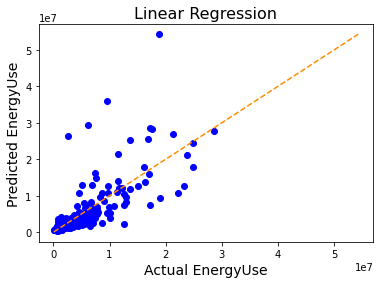

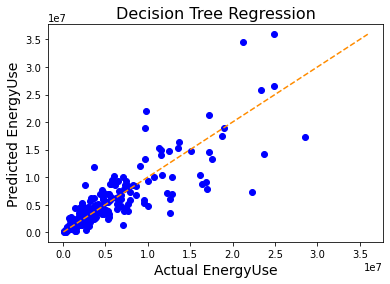

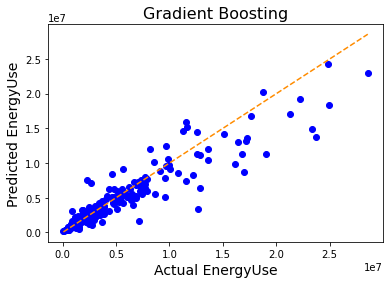

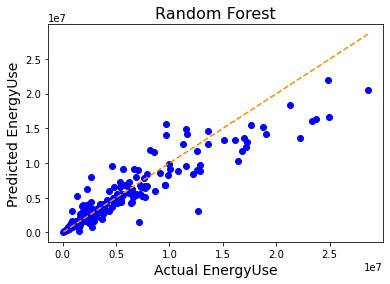

In [18]:
plt.scatter(y_test, ypred_as_series, c ="blue")
line_coords = np.arange(data_linear_regression.min().min(),
                        data_linear_regression.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.ylabel('Predicted EnergyUse', fontsize=14)
plt.xlabel('Actual EnergyUse', fontsize=14)
plt.title('Linear Regression', fontsize=16)
plt.show()

plt.scatter(y_test, yhat_as_series, c ="blue")
line_coords = np.arange(data_decision_tree.min().min(),
                        data_decision_tree.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.ylabel('Predicted EnergyUse', fontsize=14)
plt.xlabel('Actual EnergyUse', fontsize=14)
plt.title('Decision Tree Regression', fontsize=16)
plt.show()

plt.scatter(y_test, y_pred_gradient_as_series, c ="blue")
line_coords = np.arange(data_gradientboost.min().min(),
                        data_gradientboost.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.ylabel('Predicted EnergyUse', fontsize=14)
plt.xlabel('Actual EnergyUse', fontsize=14)
plt.title('Gradient Boosting', fontsize=16)
plt.show()

plt.scatter(y_test, y_pred_forest_as_series, c ="blue")
line_coords = np.arange(data_forest.min().min(),
                        data_forest.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.ylabel('Predicted EnergyUse', fontsize=14)
plt.xlabel('Actual EnergyUse', fontsize=14)
plt.title('Random Forest', fontsize=16)
plt.show()

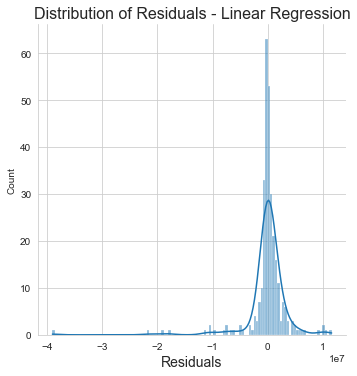

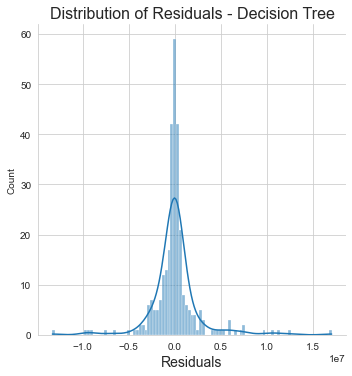

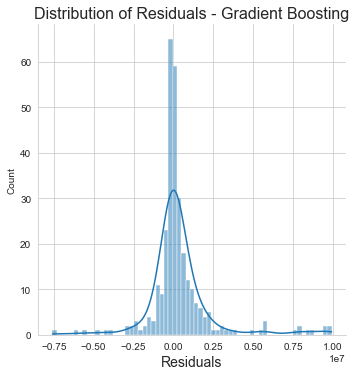

In [189]:
sns.displot(data=data_linear_regression, x= data_linear_regression['SiteEnergyUseWN(kBtu)'] - data_linear_regression[0], kde=True)
plt.xlabel('Residuals', fontsize=14)
plt.title('Distribution of Residuals - Linear Regression', fontsize=16)
plt.show()

sns.displot(data=data_decision_tree, x= data_decision_tree['SiteEnergyUseWN(kBtu)'] - data_decision_tree[0], kde=True)
plt.xlabel('Residuals', fontsize=14)
plt.title('Distribution of Residuals - Decision Tree', fontsize=16)
plt.show()

sns.displot(data=data_gradientboost, x= data_gradientboost['SiteEnergyUseWN(kBtu)'] - data_gradientboost[0], kde=True)
plt.xlabel('Residuals', fontsize=14)
plt.title('Distribution of Residuals - Gradient Boosting', fontsize=16)
plt.show()

/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_1345/3224859133.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

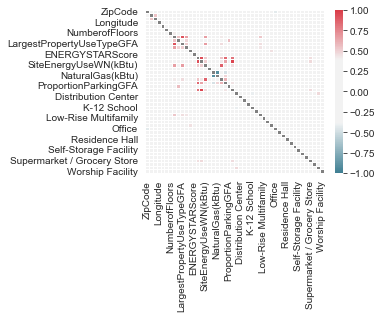

In [190]:
corr = df.corr()
corr

mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

sns.heatmap(corr,mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5 )

In [ ]:
# TODO: faire une transfo logarithmique a faire avant le standard scaler - attention retirer le ENERGYSCORE
# => faire uniquement sur la variable concerne (i.e Target) - attention a comparer des choses comparable (i.e retransformer le log back into original values) log 10 easy.
#1bis/ TODO: tester un nouveau model / RandomForest
#2/ TODO: analyser les feature importance - recuperer le score feature importance via Gradient Boosting. vue "Global"
#3/ TODO: SHAP librairie - voir dans resource "SHAP tuto" - graphique plus detaillee (optionelle) - vue "Local"
#4/ TODO: analyser l'impact de l'EnergieStarscore => ajouter le parametre et comparer les perfs avec version sans ce param.

#5/ Appliquer la meme chose aux emissions de gaz